# Edge detection
In clesperanto, multiple filters for edge-detection are implemented.

See also
* [Wikipedia](https://en.wikipedia.org/wiki/Edge_detection)

In [1]:
import pyclesperanto as cle
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

cle.select_device("TX")

(OpenCL) NVIDIA GeForce RTX 2080 SUPER (OpenCL 3.0 CUDA)
	Type: GPU
	Compute Units: 48
	Global Memory Size: 8358 MB
	Maximum Object Size: 2089 MB

array([[ 40.,  32.,  24., ..., 216., 200., 200.],
       [ 56.,  40.,  24., ..., 232., 216., 216.],
       [ 64.,  48.,  24., ..., 240., 232., 232.],
       ...,
       [ 72.,  80.,  80., ...,  48.,  48.,  48.],
       [ 80.,  80.,  80., ...,  48.,  48.,  48.],
       [ 96.,  88.,  80., ...,  48.,  48.,  48.]], dtype=float32, mtype=buffer)
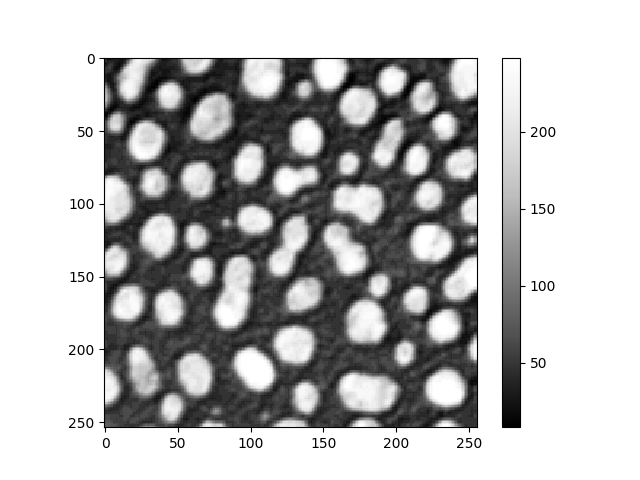
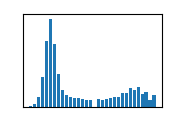

In [2]:
blobs = cle.asarray(imread('https://samples.fiji.sc/blobs.png').squeeze().astype(np.float32))
blobs

## Sobel operator
[see also](https://en.wikipedia.org/wiki/Sobel_operator)

array([[ 68.818596,  86.162636,  40.792156, ..., 132.42355 ,  90.50967 ,
         64.      ],
       [104.307236, 132.42355 ,  60.92618 , ..., 124.45079 , 132.42355 ,
        128.      ],
       [ 67.88225 , 120.266365,  57.68882 , ...,  68.818596,  68.818596,
         64.      ],
       ...,
       [ 60.92618 ,  46.647614,  32.      , ...,   0.      ,   0.      ,
          0.      ],
       [ 80.      ,  40.792156,  11.313708, ...,   0.      ,   0.      ,
          0.      ],
       [ 60.92618 ,  57.68882 ,  25.298222, ...,   0.      ,   0.      ,
          0.      ]], dtype=float32, mtype=buffer)
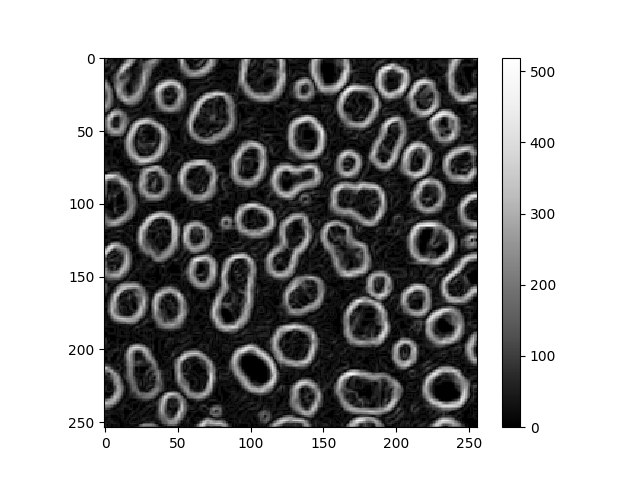
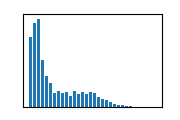

In [3]:
blobs_sobel = cle.sobel(blobs)
blobs_sobel

## Laplace operator
[see also](https://en.wikipedia.org/wiki/Discrete_Laplace_operator)

array([[-16., -24., -32., ..., -40., -96., -48.],
       [ 64.,   8., -56., ...,  40., -40.,   0.],
       [128.,  64., -88., ...,  40.,  16.,  48.],
       ...,
       [-16.,  40.,  24., ...,   0.,   0.,   0.],
       [-24., -16.,  -8., ...,   0.,   0.,   0.],
       [ 64.,  24., -16., ...,   0.,   0.,   0.]], dtype=float32, mtype=buffer)
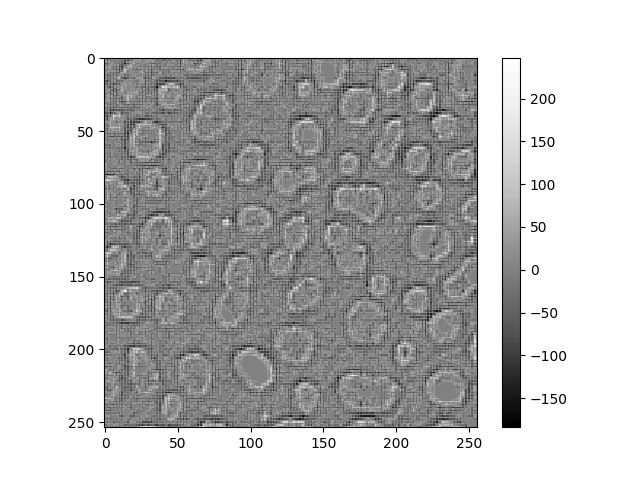
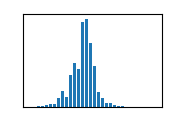

In [4]:
blobs_laplace = cle.laplace_box(blobs)
blobs_laplace

## Laplacian of Gaussian
[Also kown as the Mexican hat filter](https://en.wikipedia.org/wiki/Ricker_wavelet)

array([[ 4.0292892e+00, -1.2073446e+01, -1.8767862e+01, ...,
        -2.4071930e+01, -4.2564835e+01, -4.3117264e+01],
       [ 3.8663589e+01,  7.3365555e+00, -1.4639391e+01, ...,
         1.7002869e-01, -1.1119934e+01, -1.0878845e+01],
       [ 4.8312847e+01,  1.6537041e+01, -9.0019722e+00, ...,
         1.0817398e+01,  5.5904999e+00,  7.3575897e+00],
       ...,
       [-9.9587555e+00,  2.2583618e+00,  8.7143173e+00, ...,
        -3.4641266e-02, -6.5834045e-02, -8.7974548e-02],
       [ 3.1555176e+00,  4.3389587e+00,  6.1775436e+00, ...,
         9.4604492e-04, -2.0751953e-03, -2.7618408e-03],
       [ 2.8555283e+01,  1.4304092e+01,  5.4096375e+00, ...,
         2.7618408e-03,  0.0000000e+00,  0.0000000e+00]], dtype=float32, mtype=buffer)
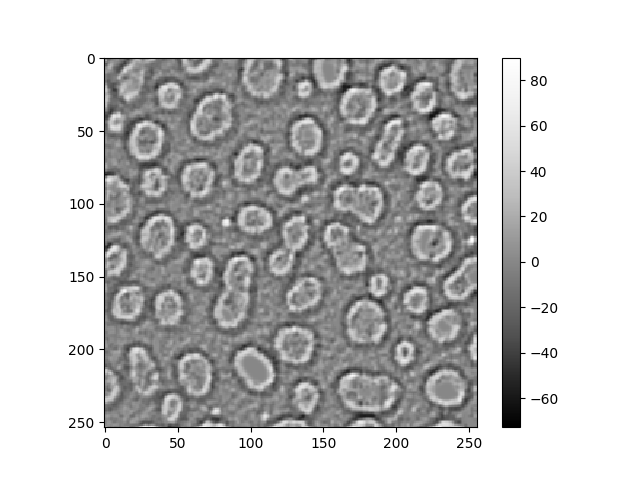
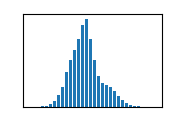

In [5]:
blobs_laplacian_of_gaussian = cle.laplace_box(cle.gaussian_blur(blobs, sigma_x=1, sigma_y=1))
blobs_laplacian_of_gaussian

array([[ 0.72808456, -2.071373  , -2.746025  , ..., -2.3330078 ,
        -3.2956543 , -8.296265  ],
       [ 1.8013725 , -0.44898605, -0.7979202 , ...,  1.9601135 ,
         1.2943573 , -3.1303253 ],
       [ 1.3617783 , -0.51297   , -0.86735916, ...,  2.0795288 ,
         1.477066  , -2.557602  ],
       ...,
       [ 2.9277039 ,  0.15542603,  0.13283539, ..., -1.0573006 ,
        -0.7716141 , -1.2406998 ],
       [ 3.794983  ,  0.58216095,  0.51379395, ..., -1.1535568 ,
        -0.8609543 , -1.531456  ],
       [10.268112  ,  6.282089  ,  5.694229  , ..., -0.45280457,
        -0.52132416, -1.594841  ]], dtype=float32, mtype=buffer)
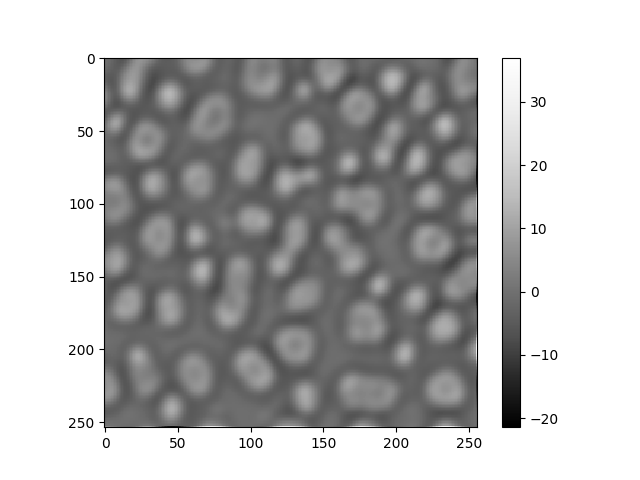
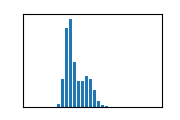

In [6]:
blobs_laplacian_of_gaussian = cle.laplace_box(cle.gaussian_blur(blobs, sigma_x=5, sigma_y=5))
blobs_laplacian_of_gaussian

## Local Variance filter

array([[1.4995265e+02, 1.4052817e+02, 1.2398716e+02, ..., 3.0728381e+02,
        3.1707550e+02, 3.0995044e+02],
       [1.5246176e+02, 1.4342188e+02, 1.2909299e+02, ..., 2.7081000e+02,
        2.8300577e+02, 2.8180820e+02],
       [1.5338840e+02, 1.4492552e+02, 1.3323695e+02, ..., 2.3150333e+02,
        2.4431119e+02, 2.4681158e+02],
       ...,
       [1.7072482e+02, 1.6290892e+02, 1.5444627e+02, ..., 9.5031595e+00,
        7.5798044e+00, 8.4628143e+00],
       [1.6226210e+02, 1.5775095e+02, 1.5362428e+02, ..., 5.8138118e+00,
        3.0161848e+00, 3.4882882e+00],
       [1.5486595e+02, 1.5207706e+02, 1.5135129e+02, ..., 3.4882951e+00,
        1.4551915e-11, 1.4551915e-11]], dtype=float32, mtype=buffer)
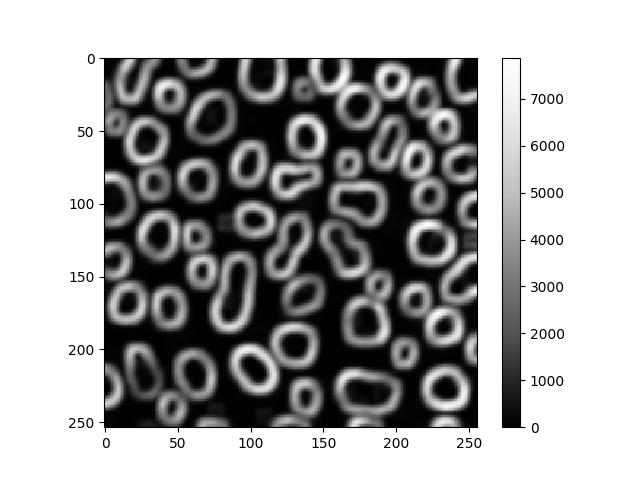
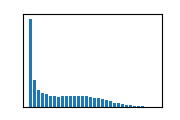

In [7]:
blobs_edges = cle.variance_box(blobs, radius_x=5, radius_y=5)
blobs_edges

# Local standard deviation
... is just the square root of the local variance

array([[1.22455149e+01, 1.18544579e+01, 1.11349516e+01, ...,
        1.75295124e+01, 1.78066158e+01, 1.76054077e+01],
       [1.23475409e+01, 1.19758873e+01, 1.13619089e+01, ...,
        1.64563065e+01, 1.68227768e+01, 1.67871456e+01],
       [1.23850069e+01, 1.20385017e+01, 1.15428314e+01, ...,
        1.52152328e+01, 1.56304569e+01, 1.57102375e+01],
       ...,
       [1.30661697e+01, 1.27635784e+01, 1.24276409e+01, ...,
        3.08271933e+00, 2.75314450e+00, 2.90909171e+00],
       [1.27382135e+01, 1.25598946e+01, 1.23945255e+01, ...,
        2.41118479e+00, 1.73671675e+00, 1.86769593e+00],
       [1.24445152e+01, 1.23319530e+01, 1.23024921e+01, ...,
        1.86769772e+00, 3.81469727e-06, 3.81469727e-06]], dtype=float32, mtype=buffer)
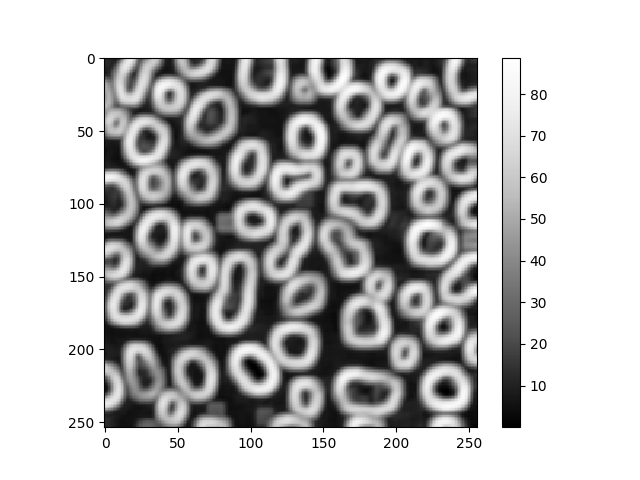
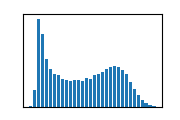

In [8]:
blobs_edges = cle.standard_deviation_box(blobs, radius_x=5, radius_y=5)
blobs_edges

## Edge detection is not edge enhancement
Intuitively, one could apply an edge detection filter to enhance edges in images showing edges. Let's try with an image showing membranes. It's a 3D image btw.

array([[[ 62,  90, 110, ...,  64,  63,  63],
        [ 66,  88, 115, ...,  72,  57,  63],
        [ 60,  80, 120, ...,  49,  55,  46],
        ...,
        [ 84,  82,  61, ...,  39,  57,  75],
        [ 84,  89,  68, ...,  52,  51,  56],
        [ 67,  91,  67, ...,  50,  50,  74]],

       [[ 70,  83, 106, ...,  73,  67,  65],
        [ 57,  97, 112, ...,  74,  77,  62],
        [ 55,  86, 114, ...,  47,  56,  64],
        ...,
        [110,  80,  63, ...,  50,  47,  59],
        [ 98,  76,  65, ...,  44,  57,  67],
        [ 88,  77,  54, ...,  45,  55,  75]],

       [[ 70,  84, 109, ...,  55,  63,  70],
        [ 60,  59, 116, ...,  89,  60,  63],
        [ 55,  84, 103, ...,  64,  55,  59],
        ...,
        [ 88,  61,  56, ...,  38,  42,  61],
        [ 93,  82,  45, ...,  40,  42,  53],
        [ 86,  82,  55, ...,  40,  52,  58]],

       ...,

       [[ 28,  36,  28, ...,  66,  58,  58],
        [ 32,  39,  38, ...,  81,  65,  58],
        [ 30,  34,  35, ...,  81,  70,  79],
        ...,
        [ 53,  50,  62, ...,  43,  55,  65],
        [ 53,  69,  65, ...,  49,  55,  57],
        [ 58,  69,  72, ...,  44,  68,  45]],

       [[ 34,  47,  36, ...,  68,  63,  53],
        [ 37,  46,  35, ...,  88,  78,  55],
        [ 33,  42,  47, ...,  85,  66,  78],
        ...,
        [ 56,  56,  58, ...,  61,  69,  68],
        [ 56,  58,  59, ...,  49,  49,  56],
        [ 56,  74,  70, ...,  47,  56,  63]],

       [[ 35,  36,  33, ...,  63,  75,  48],
        [ 38,  42,  39, ...,  81,  66,  56],
        [ 40,  41,  41, ...,  90,  70,  70],
        ...,
        [ 45,  60,  59, ...,  70,  59,  86],
        [ 51,  69,  59, ...,  53,  65,  56],
        [ 65,  61,  67, ...,  57,  54,  60]]], dtype=uint8, mtype=buffer)
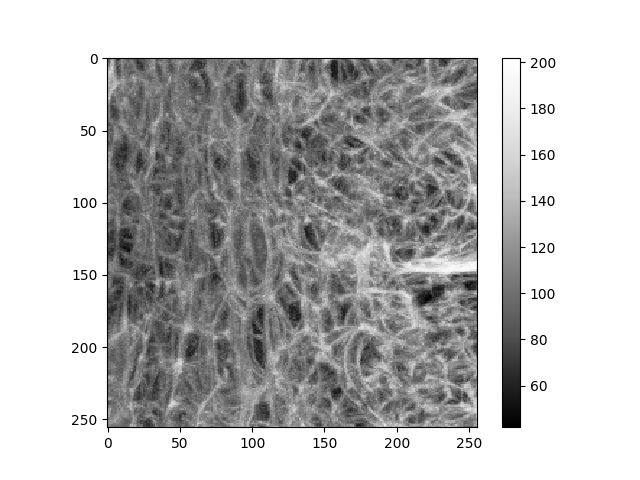
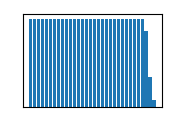

In [9]:
image = cle.asarray(imread("https://github.com/clEsperanto/clesperanto_example_data/raw/main/EM_C_6_c0.tif"))
image

array([[36, 39, 25, ..., 63, 35, 30],
       [28, 35, 34, ..., 65, 49, 35],
       [33, 30, 33, ..., 74, 60, 41],
       ...,
       [82, 91, 94, ..., 27, 34, 30],
       [80, 92, 83, ..., 28, 28, 23],
       [85, 73, 52, ..., 33, 31, 26]], dtype=uint8, mtype=buffer)
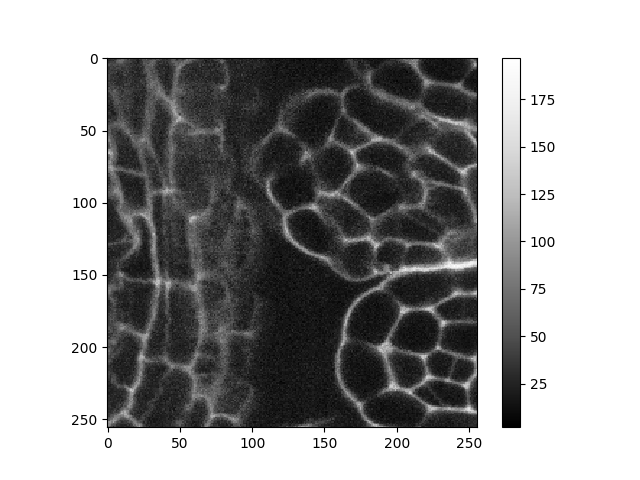
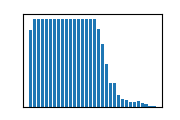

In [10]:
image[60]

array([[ 94,  46,  70, ..., 255, 255, 159],
       [ 81,  75,  35, ..., 255, 255, 255],
       [115,  69,  92, ..., 116, 255, 255],
       ...,
       [255, 222, 255, ...,  98, 100,  77],
       [190, 255, 255, ...,  89,  95,  72],
       [255, 255, 255, ...,  51,  85,  61]], dtype=uint8, mtype=buffer)
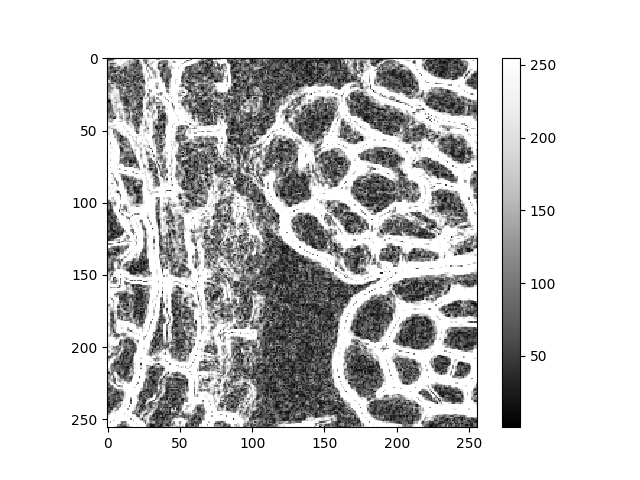
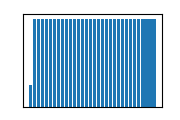

In [11]:
image_sobel = cle.sobel(image)
image_sobel[60]

When looking very carefully, you may observe that the edges are a bit thicker in the second image. The edge detection filter detects two edges, the increasing signal side of the membrane and the decreasing signal on the opposite side. Let's zoom:

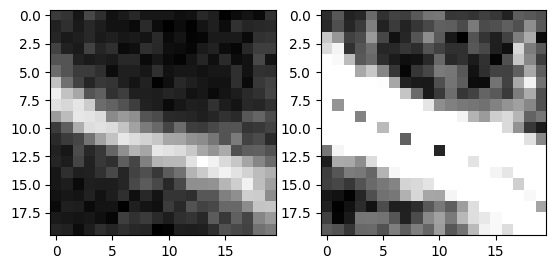

In [12]:
fig, axs = plt.subplots(1, 2)
cle.imshow(                image[60, 125:145, 135:155], plot=axs[0])
cle.imshow(cle.pull(image_sobel)[60, 125:145, 135:155], plot=axs[1])

## Enhancing edges
Thus, to enhance edges in a membrane image, other filters are more useful. Enhancement may for example mean making membranes thicker and potentially closing gaps.

## Local standard deviation

array([[ 7.2811127,  8.134171 ,  9.307512 , ..., 22.200243 , 22.482307 ,
        22.947567 ],
       [ 7.5273857,  8.278003 ,  9.340383 , ..., 22.438185 , 22.56258  ,
        22.862795 ],
       [ 7.616371 ,  8.273025 ,  9.217965 , ..., 22.246208 , 22.198236 ,
        22.322102 ],
       ...,
       [21.216778 , 21.85669  , 22.474318 , ...,  5.8944054,  6.05584  ,
         6.110779 ],
       [20.41613  , 21.406458 , 22.281708 , ...,  4.99587  ,  5.0696263,
         5.0190578],
       [19.928556 , 21.22558  , 22.26661  , ...,  4.812277 ,  4.8982363,
         4.8279533]], dtype=float32, mtype=buffer)
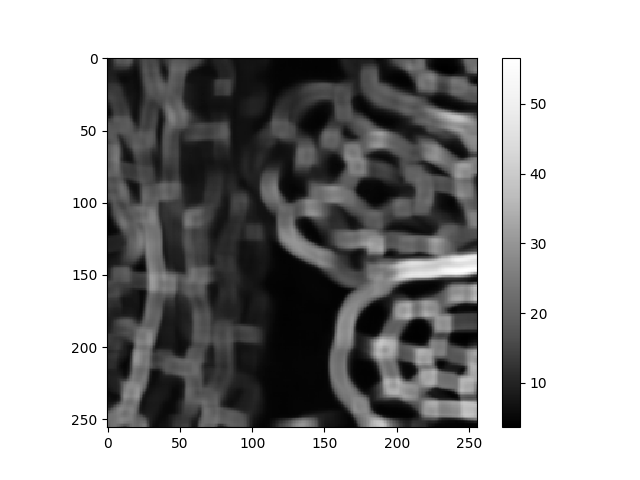
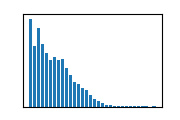

In [13]:
image_std = cle.standard_deviation_box(image, radius_x=5, radius_y=5, radius_z=5)
image_std[60]

## Local maximum

array([[ 81,  81,  81, ..., 116, 116, 116],
       [ 81,  81,  81, ..., 116, 116, 116],
       [ 81,  81,  81, ..., 116, 116, 116],
       ...,
       [126, 126, 126, ...,  52,  52,  52],
       [126, 126, 126, ...,  44,  44,  44],
       [126, 126, 126, ...,  44,  44,  44]], dtype=uint8, mtype=buffer)
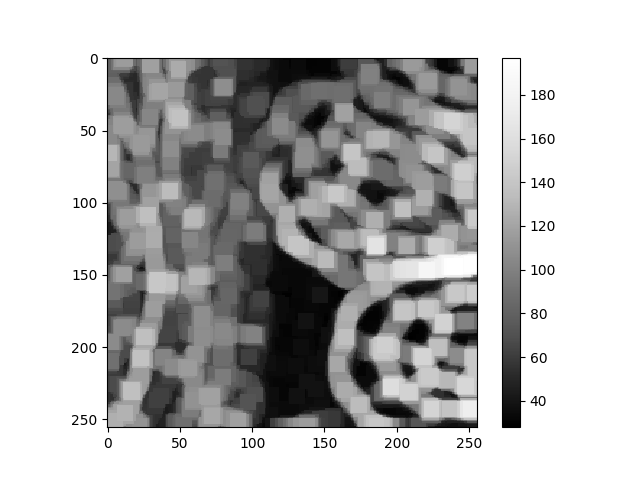
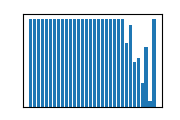

In [14]:
image_max = cle.maximum_box(image, radius_x=5, radius_y=5, radius_z=5)
image_max[60]